# Enterprise Data Science 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

from datetime import datetime


pd.set_option('display.max_rows',500)

![Crisp_DM](CRISP_DM.png)

# Data Preparation

* Focus on the understanding of final data structure
* To support each step by Visual Analytics

## John Hopkins GITHUB csv data

In [2]:
data_path='C:/Users/jitin/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20',
       '9/11/20', '9/12/20', '9/13/20'],
      dtype='object', length=236)

In [5]:
 time_idx=pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
df_full_plot = pd.DataFrame({
    'date':time_idx})
df_full_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
allcountrylist=pd_raw['Country/Region'].unique()
allcountrylist.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [9]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [10]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'India',
             ]

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [12]:
for each in  allcountrylist:
    df_full_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [13]:
df_plot

,date,Italy,US,Spain,Germany,India
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0
5,1/27/20,0,5,0,1,0
6,1/28/20,0,5,0,4,0
7,1/29/20,0,5,0,4,0
8,1/30/20,0,5,0,4,1
9,1/31/20,2,7,0,5,1


In [14]:
df_full_plot

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
5,1/27/20,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0
6,1/28/20,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0
7,1/29/20,0,0,0,0,0,0,0,0,6,...,0,0,0,0,2,0,0,0,0,0
8,1/30/20,0,0,0,0,0,0,0,0,9,...,0,0,0,0,2,0,0,0,0,0
9,1/31/20,0,0,0,0,0,0,0,0,9,...,2,0,0,0,2,0,0,0,0,0


C:\Users\jitin\anaconda3\envs\myenv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

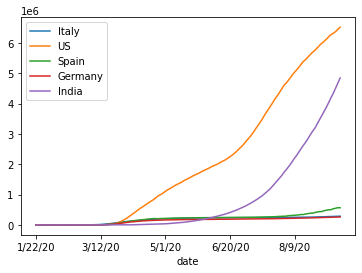

In [15]:
df_plot.set_index('date').plot()

## Conversion of Data Type Date

In [16]:
df_plot.head()

,date,Italy,US,Spain,Germany,India
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


In [17]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [18]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_full_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [20]:
df_full_plot['date']=time_idx
type(df_full_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df_plot.head()

,date,Italy,US,Spain,Germany,India
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [22]:
df_plot.to_csv('C:/Users/jitin/ads_covid-19/data/processed/COVID_small_flat_table.csv',sep=';',index=False)

In [23]:
df_full_plot.to_csv('C:/Users/jitin/ads_covid-19/data/processed/COVID_full_flat_table.csv',sep=';',index=False)

## Relational Data Model - Defining a Primary Key

In the relational model of databases, a primary key a specific choice of a minimal set of attributes that uniquely specify a Tuple in a realtion 

A primary Key,s MAin Function are:
* It must contain a unique value of each row of data.
* It cannot Contain null values

In [24]:
 data_path='C:/Users/jitin/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
#pd_full_raw=read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [25]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [26]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,no,Albania,0,0,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,no,Algeria,0,0,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,no,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,no,Angola,0,0,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [27]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing


In [28]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,no,Albania,0,0,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,no,Algeria,0,0,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,no,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,no,Angola,0,0,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [29]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [30]:
pd_relational_model.dtypes


date          object
state         object
country       object
confirmed    float64
dtype: object

In [31]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [32]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [33]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)
pd_relational_model.to_csv('C:/Users/jitin/ads_covid-19/data/processed//COVID_relational_confirmed.csv',sep=';',index=False)

In [34]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
61698 2020-09-09    no      US    6360212
61964 2020-09-10    no      US    6396100
62230 2020-09-11    no      US    6443652
62496 2020-09-12    no      US    6485123
62762 2020-09-13    no      US    6519573
